<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Semana_5/linear_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresión Lineal**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 31 de enero de 2022 
*   Fechad de actualización: 1 de febrero de 2022
*   Descripción: SE realiza la regresion lineal apartir de los ejercios automos dictados en la plataforma de coding dojo y se calcula los valores de ajuste como los claculos de los errores ademas del r cuadrado.

In [1]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Mounted at /content/drive


In [2]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 
from sklearn.linear_model import LinearRegression #para realizar regresiones y modelos 

In [3]:
mortage =  '/content/drive/MyDrive/Coding_Dojo/Semana 5/Data/modifiedBostonHousing.csv' #Nombro a la base
mortage_df = pd.read_csv(mortage) #le doy un nombre a la trama tener en cuenta que tipo dearchivo estoy leyendo
mortage_df.head() #Observo que los datos hayan sido leidos de forma correcta

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Revision de la Base 

In [4]:
mortage_df.columns= mortage_df.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula

In [5]:
mortage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    505 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### Al observar la base vemos que nuestra columna de precio la cueal sera el vector objetivo contiene un dato perdido por lo cual procedemos a eliminar la fila completa de este dato ya que el porcentaje de perdida es minimo. Se recomienda siempre sacar un potcentaje de perdida para evitar eliminar una cantidad excesiva de datos, este porcentaje de maxima tolerancia va depoender del modelo y la cantidad de datos, sin embargo, se recomienda que los valores perdidos noe excedan el **30%** 

In [6]:
mortage_df.shape # con .shape reviso la bidimensionalidad de mis datos 

(506, 14)

In [7]:
mortage_df = mortage_df.loc[:, ['rm', 'lstat','ptratio', 'price']] #establezco cual sera mi matriz de caracteristicas 
mortage_df.head()

,rm,lstat,ptratio,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [8]:
mortage_df = mortage_df.dropna(how = 'any') # elimino los valores perdidos

In [9]:
mortage_df.info() # observo que todos mis datos sean de la misma longitud una vez eliminando el valor perdido 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rm       505 non-null    float64
 1   lstat    505 non-null    float64
 2   ptratio  505 non-null    float64
 3   price    505 non-null    float64
dtypes: float64(4)
memory usage: 19.7 KB


In [10]:
mortage_df.isnull().sum() #otra manera de revisar esto es con el conteo de valores perdidos aqui buscamos que la suma sea 0

rm         0
lstat      0
ptratio    0
price      0
dtype: int64

In [11]:
mortage_df.shape #debo mantener unacontante revision de que mis dfatos mantengan su bidimensionalidad

(505, 4)

In [12]:
mortage_corr= round(mortage_df.corr(),2) #el comando .corr de la libreria de regresion no permite observar la no multicolinealidad, para evitar que un dato este abserviendo la 
#informacion de los otros datos
mortage_corr

,rm,lstat,ptratio,price
rm,1.00,-0.61,-0.36,0.14
lstat,-0.61,1.00,0.37,-0.03
ptratio,-0.36,0.37,1.00,-0.19
price,0.14,-0.03,-0.19,1.00


##### En esta matriz de correlacion observamos una alta relacion inversa entre lstat y rm la cual aun apesar de tener un valor amplio y el mas cercano a uno no tomaremos como grave ya que la mayoria de autores de modelos de regresion lineal ponen como grave una correlacion o una alta colinealidad cuando esta supera el **0.75** sin embargo

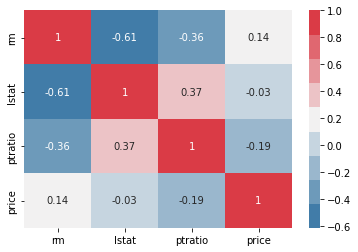

In [14]:
sns.heatmap(mortage_corr, cmap = sns.diverging_palette(240, 10, n=9), annot= True) # el comando cmap= me permite definir el color de la paleta la cual es sns.diverging_palette 
#esta me permite tener los colores rojo para los valores mas alto apartir de la media ya zules para aquelloos que se alejan de la misma 

##### El grafico nos muestra que las relaciones inversas mas altas son entre rm y lstat mientras que las relaciones positivas mas altas son las de ptratio y lstat, lo que nos puede dar una idea de que esta variable podria presentar un reiesgo parta el modelo sin embargo al no ser mayor a 0.75 no realizaremos ningun cambio 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22e7d29f90>,
      dtype=object)

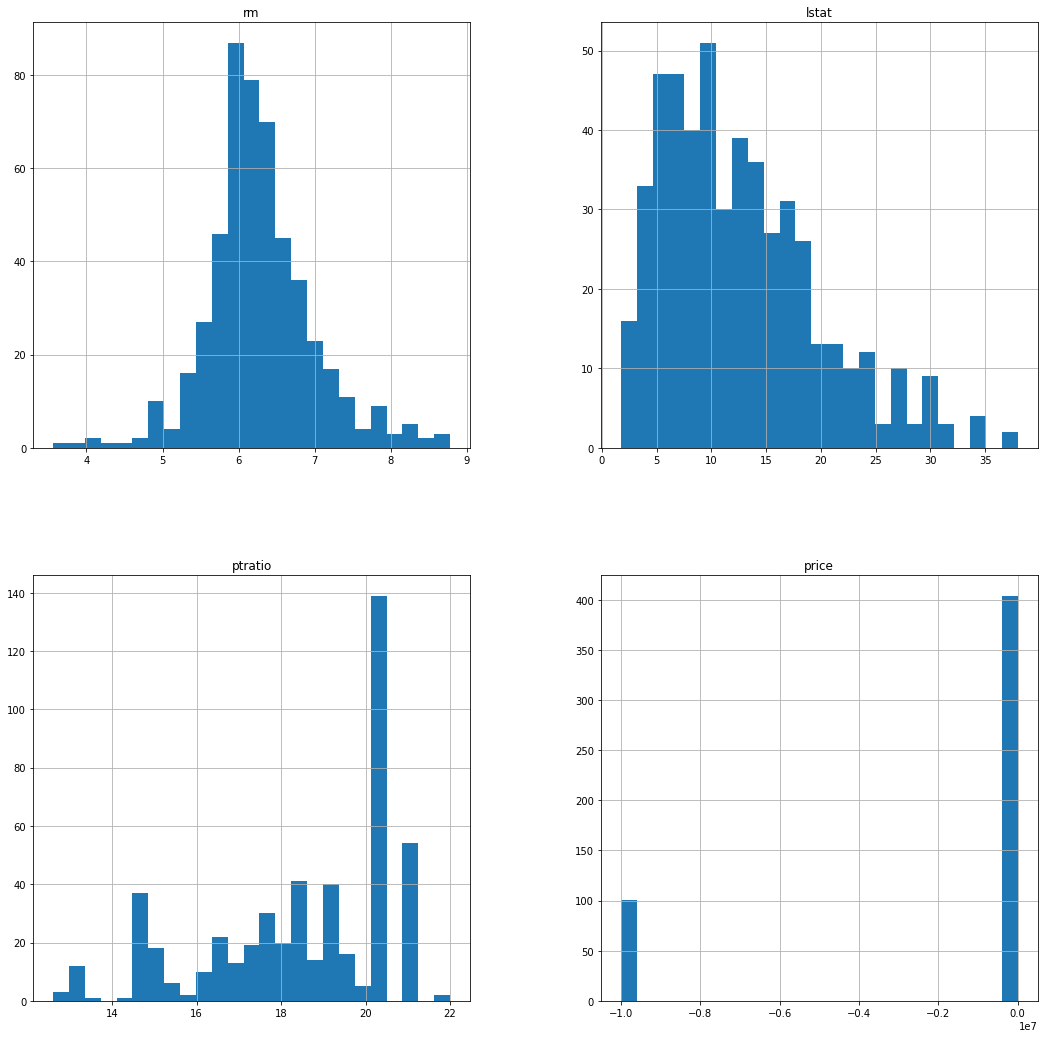

In [15]:
mortage_df.loc[:,:].hist(bins=25, figsize=(18,18), xlabelsize='10', ylabelsize='10', xrot= 0 ) # en este codigo primero defino todos los valores que deseo visualizar
# en este caso estoy pidiendo todas las columnas y filas ademas el bind que le pido que sean 25 secuencias para fines vizuales y el ta;o de las etiquetas en loes ejes
# ademas del xrot que me permite definir el angulo de las etiquetas en los ejes en este caso al no ser demasiado largas escojo una rotacion de 0 grados 

##### En este apartdo observo que el histograma delprecio cuenta con demasiadops valores negativos lo cual no me permite tener un conocimiento exacto de los datos, por lo cual debo tratar este problema, sin embargo, esto no es lo idoneo ya que estoy cambiando la naturaleza de los datos. 

##### Aun cuando no es lo desead manipular los datos, los modelos cuentan con los supuestos **BLUE** que me obligan a seguir manipulando la data. esto sera resuelto mas adelante con algoritmos mas complejos. 

In [16]:
price_filter = mortage_df['price'] < 0 
mortage_df = mortage_df.loc[~price_filter,:] #para plicar el filltro a toda la base ponemos el signo ~ antes del nombre del filtro la coma y le pedimo que se 
#aplique para todas las filas
mortage_df # con esta linea de codigo me desago de todoas aquellos precios negativos lo cuales afectan a mi data, sin embargo como lo habiamos mencionado esto hay que manejarlo con mucho 
#cuidado debido a que si perdemos mucha informacion el modelo puede no tener el ajuste deseado 

,rm,lstat,ptratio,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2
...,...,...,...,...
501,6.593,9.67,21.0,22.4
502,6.120,9.08,21.0,20.6
503,6.976,5.64,21.0,23.9
504,6.794,6.48,21.0,22.0


In [17]:
mortage_df.info() #con esto hemos perdido alrededor de 101 datos que representaria un 20 porciento encontrandonos dentro del margen aceptado 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rm       404 non-null    float64
 1   lstat    404 non-null    float64
 2   ptratio  404 non-null    float64
 3   price    404 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22e7a14c50>,
      dtype=object)

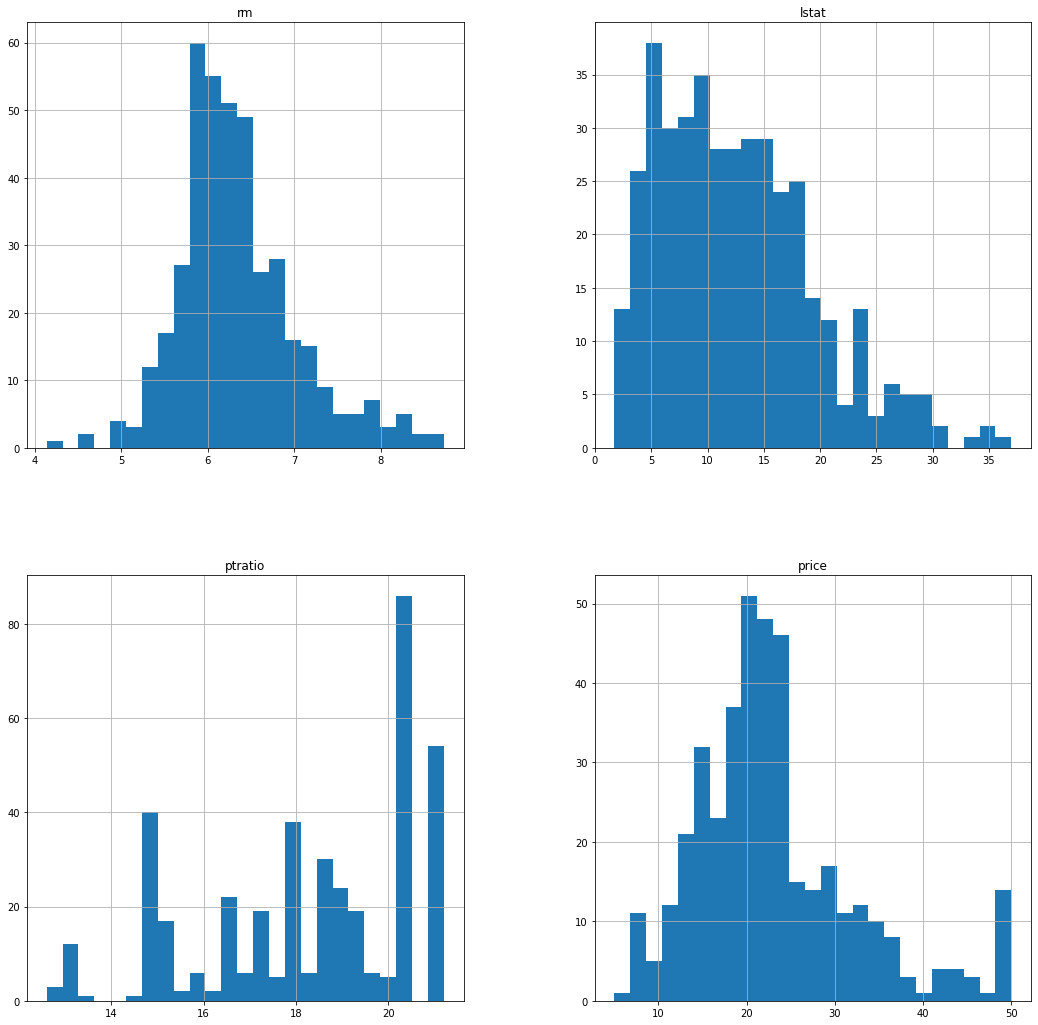

In [18]:
mortage_df.loc[:,:].hist(bins=25, figsize=(18,18), xlabelsize='10', ylabelsize='10', xrot= 0 )

#repito el histograma para revisar que el proceso anterior haya corregido el problema 

##### Observamos que el problema parace haberse corregido, recordemos que aldenir el numero de datos o columnas dentro del grafico unicamente tomamos un muestreo, lo recomendable siembre sera graficar los datos completos donde de igual manera hubieramos encontrado este movimiento atipico delos valores negativos del precio

In [19]:
mortage_corr1 = round(mortage_df.corr(),2)
mortage_corr1

,rm,lstat,ptratio,price
rm,1.00,-0.65,-0.35,0.80
lstat,-0.65,1.00,0.38,-0.75
ptratio,-0.35,0.38,1.00,-0.55
price,0.80,-0.75,-0.55,1.00


#### Una vez corregido y eliminados los valores negativos en el precio podemos observar que la matriz de correlacion notiene un cambio sustancuial por lo cual procedemos con los siguientes pasos 

### Ordenamiento de datos para la realizacion de la regresion lineal

In [20]:
X = mortage_df.loc[:,['rm','lstat','ptratio']].values #defino el nombre de mi matriz de caracteristicas con la letra mayuscula por notacion matematica ya que esta es una matriz y
#no solo un vector el cual normalmente se escribe en minuscula  
X # esto se realiza realizar el cambio de dataframe a un array de tipo numpy

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [21]:
X.shape #observo que mantega la bidimensionalidad una ves transformada mi data 

(404, 3)

In [22]:
y = mortage_df.loc[:,'price'].values #defino mi vector con letra minuscula
y # hay que tener cuidado cuando solo conta de una columna no debe ponerse corchetes ya que esto genera una fila de mas 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [23]:
y.shape #observo que mantega la bidimensionalidad una ves transformada mi data, no tiene otra dimensio ya que python maneja un idexado cero y esto no se refleja en la data 

(404,)

In [24]:
lreg = LinearRegression(fit_intercept=True)
lreg #creo una instancia inicial la cual ire llenando acontinuacion por esto el print inferior aparece vacio

LinearRegression()

In [25]:
lreg.fit(X,y) #ingreso los datos que aprendera mi modelos y que se iran llenando en mi instancia inicial, siempre va primero mi matriz de caracteristicas y despues
#el vector objetivo

LinearRegression()

In [ ]:
lreg.predict(X[0]) # si corro de esta manera el comando sale como error debido a que no es bidemensional la salida por lo cual debo redimensionarlos observando el error 

ValueError: ignored

In [26]:
lreg.predict(X[0].reshape(-1,3)) # con el comando reshape retomo la bidimensionalidad de la base que va de menos -1 a 3 por lospor el idexado 0
#que lleva python de esta manera incluyo el 0 y el dos el reshape de mi array 

array([30.93692265])

In [33]:
lreg.predict(X[0:10]) #realizo la prediccion de  10 valores 

array([30.93692265, 25.54732909, 32.87840913, 31.22126902, 31.14158522,
       26.45245446, 23.99307176, 22.0562208 , 13.67300117, 21.85868698])

### Ecuacion del modelo 

In [28]:
coef = np.around(lreg.coef_,2)
coef #obtengo los coeficientes de mi regresion 

array([ 6.61, -0.45, -1.01])

In [29]:
intercept = np.around(lreg.intercept_,2)
intercept #obtengo el intercepto de mi regresion 

5.07

In [34]:
m1 = lreg.coef_[0] #de fino las variables que lleva mi ecuacion del modelo lineal
m2 = lreg.coef_[1] #de fino las variables que lleva mi ecuacion del modelo lineal
m3 = lreg.coef_[2] #de fino las variables que lleva mi ecuacion del modelo lineal
b = lreg.intercept_
print("formula: y = {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*'PTRATIO + {:.2f}".format(m1,m2,m3,b) ) #genero una cadena la cual muestre de manera clara mi forula de la ecuacion

formula: y = 6.61*RM + -0.45*LSTAT + -1.01*'PTRATIO + 5.07


### Ajuste del Modelo 

In [32]:
r_2 = round(lreg.score(X,y),2)
print( 'El valor r cuadrdrado es de:', r_2)

El valor r cuadrdrado es de: 0.78


In [36]:
yp = lreg.predict(X[0:404]) #realizo la prediccion de  los valore para etotal dela array para encontrar la varianza del modelo 
yp.shape

(404,)

In [39]:
v = y - yp #obtengo las diferencias entre mi vector objetivo y mi vector predecido para usar en las formulas de los futuros indicadores de ajuste
v

array([-6.93692265e+00, -3.94732909e+00,  1.82159087e+00,  2.17873098e+00,
        5.05841478e+00,  2.24754554e+00, -1.09307176e+00,  5.04377920e+00,
        2.82699883e+00, -2.95868698e+00, -7.83277509e+00, -4.69883126e+00,
       -1.75540981e-02,  8.04006717e-01, -1.47690756e+00,  1.15827658e+00,
        2.84781627e+00,  4.89816122e-01,  5.39375605e+00,  1.41847781e+00,
        2.19817995e+00,  2.38078239e+00, -1.01046404e+00,  9.82739732e-01,
       -2.47116783e-01,  2.96203801e-01,  8.22986930e-01, -1.42390723e+00,
       -2.78399898e+00, -1.73348206e+00,  1.05652532e+00, -3.77908341e+00,
        2.26646359e+00, -3.58370452e-01, -1.68414460e+00, -1.76934794e+00,
        7.10267929e-01,  4.74061169e-01,  4.01294244e+00,  2.45677807e+00,
        2.67618305e+00, -3.07168272e+00,  3.59874516e-02, -1.15314395e-01,
       -1.73560214e+00, -7.81611087e-01,  9.86577890e-01, -1.95481241e+00,
        5.37193873e+00,  2.51735766e+00, -1.90358296e+00, -3.90074776e+00,
       -3.86979959e+00, -

In [40]:
mse = np.round(np.mean(var**2),2) # obtengo el cuadrado del error mediante la formula entregada y mi variable creada 
mse

17.92

In [42]:
mae = np.round(np.mean(abs(var)),2) #obtengo el error absoluto medio que lo tomo como el promedio debido al 1 sobre n y el avalor absoluto de las diferencias
mae

3.23

In [41]:
rms = np.round(np.sqrt(mse),2) #la raiz de lo errores al cuadrado 
rms

4.23